# Data Science Challenge

In [217]:
# If additional packages are needed that are not installed by default, uncomment the last two lines of this 
# cell and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [218]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH AM/PM)
`season` | Season (spring, summer, fall, winter)
`holiday` | Whether day is a holiday or not (Yes or No)
`workingday` | Whether day is a working day or not (Yes or No)
`weather`| Weather condition (Clear or partly cloudy, Mist, Light snow or rain, heavy rain/ice pellets/ snow + fog 
`temp`| Average temperature recorded for the hour ( in degree Celsius)
`temp_feel`| Average feeling temperature recorded for the hour ( in degree Celsius)
`hum`| Average humidity recorded for the hour (in %)
`windspeed`| Average wind speed recorded for the hour (in miles/hour)
`demand`| Hourly count of bikes rented

## Data Wrangling & Visualization

In [219]:
# The dataset is already loaded below
data = pd.read_csv("train.csv")

In [220]:
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [221]:
#Explore columns
data.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [222]:
#Description
data.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


In [223]:
data

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0000,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0000,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0000,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0000,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8703,8704,2018-08-05 00:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,19.0012,5.030438
8704,8705,2018-08-05 01:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,16.9979,4.465908
8705,8706,2018-08-05 02:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,19.9995,4.290459
8706,8707,2018-08-05 03:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979,3.713572


In [224]:
data.isna().sum()

id               0
timestamp        0
season           0
holiday          0
workingday       0
weather          0
temp          1202
temp_feel      102
humidity        39
windspeed      200
demand           0
dtype: int64

In [225]:
data.shape

(8708, 11)

In [226]:
data.temp

0        9.84
1        9.02
2        9.02
3        9.84
4        9.84
        ...  
8703    30.34
8704    30.34
8705    30.34
8706    29.52
8707    29.52
Name: temp, Length: 8708, dtype: float64

In [227]:
data.temp_feel

0       14.395
1       13.635
2       13.635
3       14.395
4       14.395
         ...  
8703    34.850
8704    34.850
8705    34.850
8706    34.850
8707    34.850
Name: temp_feel, Length: 8708, dtype: float64

In [228]:
data.windspeed

0        0.0000
1        0.0000
2        0.0000
3        0.0000
4        0.0000
         ...   
8703    19.0012
8704    16.9979
8705    19.9995
8706    16.9979
8707    16.9979
Name: windspeed, Length: 8708, dtype: float64

### Remove NA

In [229]:
df_fill_val=data.groupby('season').mean()

In [230]:
df_fill_val

,id,temp,temp_feel,humidity,windspeed,demand
season,,,,,,
fall,4838.530177,29.220612,33.149721,63.467295,11.566576,4.770098
spring,3423.521221,12.539313,15.208445,56.323364,14.649567,3.984206
summer,4736.750823,22.875124,26.670486,60.848841,13.401676,4.703267
winter,4739.000000,16.540872,20.095030,66.975073,11.290219,4.426184


In [231]:
df_fill_val.loc['spring']['temp']

12.53931330472101

In [232]:
for i in range(len(data.temp)):
  if pd.isna(data.temp[i])==True:
    data.temp[i]=df_fill_val.loc[data.season[i]]['temp']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [233]:
data.isna().sum()

id              0
timestamp       0
season          0
holiday         0
workingday      0
weather         0
temp            0
temp_feel     102
humidity       39
windspeed     200
demand          0
dtype: int64

In [234]:
for i in range(len(data.temp)):
  if pd.isna(data.temp_feel[i])==True:
    data.temp_feel[i]=df_fill_val.loc[data.season[i]]['temp_feel']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [235]:
for i in range(len(data.temp)):
  if pd.isna(data.humidity[i])==True:
    data.humidity[i]=df_fill_val.loc[data.season[i]]['humidity']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [236]:
for i in range(len(data.windspeed)):
  if pd.isna(data.windspeed[i])==True:
    data.windspeed[i]=df_fill_val.loc[data.season[i]]['windspeed']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [237]:
data.isna().sum()

id            0
timestamp     0
season        0
holiday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
demand        0
dtype: int64

### Dummies

In [238]:
from datetime import datetime
data.timestamp=pd.to_datetime(data.timestamp )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          8708 non-null   int64         
 1   timestamp   8708 non-null   datetime64[ns]
 2   season      8708 non-null   object        
 3   holiday     8708 non-null   object        
 4   workingday  8708 non-null   object        
 5   weather     8708 non-null   object        
 6   temp        8708 non-null   float64       
 7   temp_feel   8708 non-null   float64       
 8   humidity    8708 non-null   float64       
 9   windspeed   8708 non-null   float64       
 10  demand      8708 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 748.5+ KB


In [239]:
print("Check for categorical values")

df_categoric_features = data.select_dtypes(include = object)
df_categoric_features.columns


Check for categorical values


Index(['season', 'holiday', 'workingday', 'weather'], dtype='object')

In [240]:
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = False)

In [241]:
df_numeric_features =data.select_dtypes(include=np.number)
df_numeric_features.head()

,id,temp,temp_feel,humidity,windspeed,demand
0,1,9.84,14.395,81.0,0.0,2.772589
1,2,9.02,13.635,80.0,0.0,3.688879
2,3,9.02,13.635,80.0,0.0,3.465736
3,4,9.84,14.395,75.0,0.0,2.564949
4,5,9.84,14.395,75.0,0.0,0.000000


In [242]:
df2 = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

In [243]:
print(df2)

        id   temp  temp_feel  humidity  windspeed    demand  season_fall  \
0        1   9.84     14.395      81.0     0.0000  2.772589            0   
1        2   9.02     13.635      80.0     0.0000  3.688879            0   
2        3   9.02     13.635      80.0     0.0000  3.465736            0   
3        4   9.84     14.395      75.0     0.0000  2.564949            0   
4        5   9.84     14.395      75.0     0.0000  0.000000            0   
...    ...    ...        ...       ...        ...       ...          ...   
8703  8704  30.34     34.850      70.0    19.0012  5.030438            1   
8704  8705  30.34     34.850      70.0    16.9979  4.465908            1   
8705  8706  30.34     34.850      70.0    19.9995  4.290459            1   
8706  8707  29.52     34.850      74.0    16.9979  3.713572            1   
8707  8708  29.52     34.850      74.0    16.9979  2.639057            1   

      season_spring  season_summer  season_winter  holiday_No  holiday_Yes  \
0        

In [244]:
print(data)

        id           timestamp  season holiday workingday  \
0        1 2017-01-01 00:00:00  spring      No         No   
1        2 2017-01-01 01:00:00  spring      No         No   
2        3 2017-01-01 02:00:00  spring      No         No   
3        4 2017-01-01 03:00:00  spring      No         No   
4        5 2017-01-01 04:00:00  spring      No         No   
...    ...                 ...     ...     ...        ...   
8703  8704 2018-08-05 00:00:00    fall      No         No   
8704  8705 2018-08-05 01:00:00    fall      No         No   
8705  8706 2018-08-05 02:00:00    fall      No         No   
8706  8707 2018-08-05 03:00:00    fall      No         No   
8707  8708 2018-08-05 04:00:00    fall      No         No   

                     weather   temp  temp_feel  humidity  windspeed    demand  
0     Clear or partly cloudy   9.84     14.395      81.0     0.0000  2.772589  
1     Clear or partly cloudy   9.02     13.635      80.0     0.0000  3.688879  
2     Clear or partly cloud

In [245]:
#converting timestamp into data to use
df2['Hour'] = pd.to_datetime(data['timestamp']).dt.hour
df2['Minute'] = pd.to_datetime(data['timestamp']).dt.minute
df2['Seconds']= pd.to_datetime(data['timestamp']).dt.second
df2['Day']= pd.to_datetime(data['timestamp']).dt.day
df2['Month']= pd.to_datetime(data['timestamp']).dt.month
df2['Year']= pd.to_datetime(data['timestamp']).dt.year

In [246]:
df2.head()

,id,temp,temp_feel,humidity,windspeed,demand,season_fall,season_spring,season_summer,season_winter,holiday_No,holiday_Yes,workingday_No,workingday_Yes,weather_Clear or partly cloudy,weather_Light snow or rain,weather_Mist,weather_heavy rain/ice pellets/snow + fog,Hour,Minute,Seconds,Day,Month,Year
0,1,9.84,14.395,81.0,0.0,2.772589,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,2017
1,2,9.02,13.635,80.0,0.0,3.688879,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,2017
2,3,9.02,13.635,80.0,0.0,3.465736,0,1,0,0,1,0,1,0,1,0,0,0,2,0,0,1,1,2017
3,4,9.84,14.395,75.0,0.0,2.564949,0,1,0,0,1,0,1,0,1,0,0,0,3,0,0,1,1,2017
4,5,9.84,14.395,75.0,0.0,0.000000,0,1,0,0,1,0,1,0,1,0,0,0,4,0,0,1,1,2017


In [247]:
df2.columns

Index(['id', 'temp', 'temp_feel', 'humidity', 'windspeed', 'demand',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'holiday_No', 'holiday_Yes', 'workingday_No', 'workingday_Yes',
       'weather_Clear or partly cloudy', 'weather_Light snow or rain',
       'weather_Mist', 'weather_heavy rain/ice pellets/snow + fog', 'Hour',
       'Minute', 'Seconds', 'Day', 'Month', 'Year'],
      dtype='object')

In [248]:
df2.dtypes

id                                             int64
temp                                         float64
temp_feel                                    float64
humidity                                     float64
windspeed                                    float64
demand                                       float64
season_fall                                    uint8
season_spring                                  uint8
season_summer                                  uint8
season_winter                                  uint8
holiday_No                                     uint8
holiday_Yes                                    uint8
workingday_No                                  uint8
workingday_Yes                                 uint8
weather_Clear or partly cloudy                 uint8
weather_Light snow or rain                     uint8
weather_Mist                                   uint8
weather_heavy rain/ice pellets/snow + fog      uint8
Hour                                          

## Visualization, Modeling, Machine Learning

Build a model that can predict hourly demand and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of mean absolute error.**
- **Read the test.csv file and prepare features for testing.**

In [249]:
#Loading Test data
test=pd.read_csv('test.csv')
test.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993


Correlation between variables: 


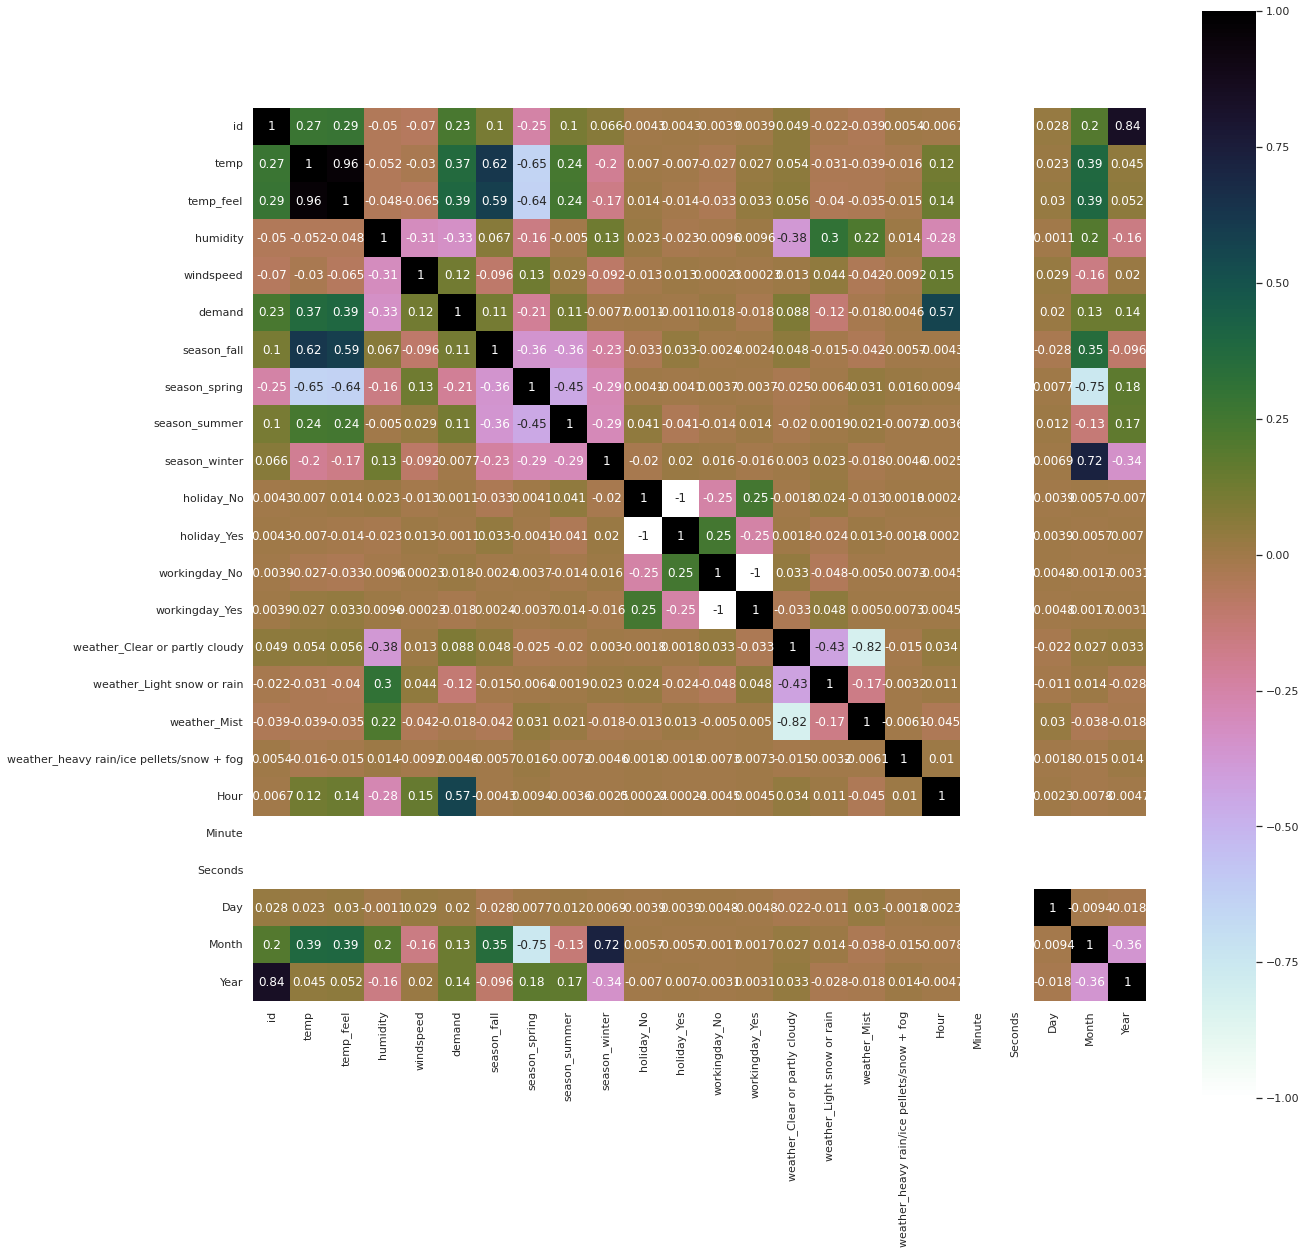

In [250]:
print("Correlation between variables: ")
corr=df2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

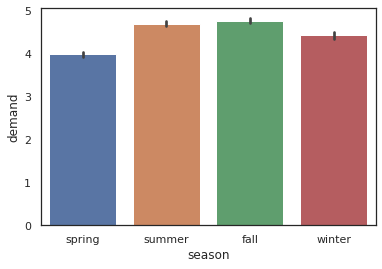

In [251]:
sns.barplot(x='season', y='demand', data=data)

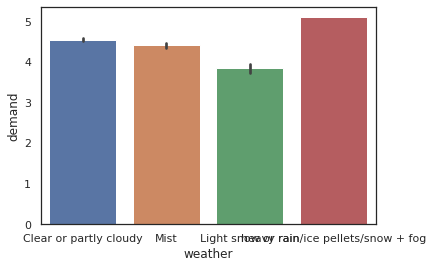

In [252]:
sns.barplot(x='weather', y='demand', data=data)

In [253]:
X=df2.drop('demand',axis=1)

In [254]:
y=df2.demand

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [256]:

from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)

In [257]:

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train_std, y_train)
y_train_pred = forest.predict(X_train_std)
y_test_pred = forest.predict(X_test_std)

In [258]:

from sklearn.metrics import mean_squared_error, r2_score
#Root_Mean_Square_Log_Error(RMSE) is accuracy criteria for this problem
print('RMSLE train: %.3f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred + 1))))
print('RMSLE test: %.3f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_pred + 1))))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
print('R2 test: %.3f' % r2_score(y_test, y_test_pred))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test_pred, y_test))

RMSLE train: 0.051
RMSLE test: 0.132
R2 train: 0.992
R2 test: 0.935
0.24958850435662414




**Identify the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


Feature: 0, Score: 0.08933
Feature: 1, Score: 0.01286
Feature: 2, Score: 0.03497
Feature: 3, Score: 0.01825
Feature: 4, Score: 0.00811
Feature: 5, Score: 0.00038
Feature: 6, Score: 0.00075
Feature: 7, Score: 0.00054
Feature: 8, Score: 0.00021
Feature: 9, Score: 0.00069
Feature: 10, Score: 0.00075
Feature: 11, Score: 0.02440
Feature: 12, Score: 0.03050
Feature: 13, Score: 0.00103
Feature: 14, Score: 0.01064
Feature: 15, Score: 0.00068
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.75329
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00797
Feature: 21, Score: 0.00440
Feature: 22, Score: 0.00026


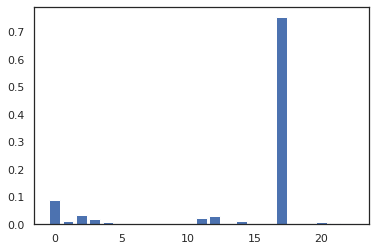

In [259]:
# get importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [260]:
test.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993


In [183]:
test.isna().sum()

id            0
timestamp     0
season        0
holiday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
dtype: int64

In [261]:
test.timestamp=pd.to_datetime(test.timestamp )
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          1792 non-null   int64         
 1   timestamp   1792 non-null   datetime64[ns]
 2   season      1792 non-null   object        
 3   holiday     1792 non-null   object        
 4   workingday  1792 non-null   object        
 5   weather     1792 non-null   object        
 6   temp        1792 non-null   float64       
 7   temp_feel   1792 non-null   float64       
 8   humidity    1792 non-null   float64       
 9   windspeed   1792 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 140.1+ KB


In [262]:
print("Check for categorical values")

dft_categoric_features = test.select_dtypes(include = object)
dft_categoric_features.columns


Check for categorical values


Index(['season', 'holiday', 'workingday', 'weather'], dtype='object')

In [263]:
dummy_encoded_variablest = pd.get_dummies(dft_categoric_features, drop_first = False)

In [264]:
dft_numeric_features =test.select_dtypes(include=np.number)
dft_numeric_features.head()

,id,temp,temp_feel,humidity,windspeed
0,8709,29.52,34.850,74.0,16.9979
1,8710,29.52,34.850,79.0,16.9979
2,8712,31.16,36.365,66.0,22.0028
3,8713,32.80,38.635,59.0,23.9994
4,8714,32.80,38.635,59.0,27.9993


In [265]:
dft = pd.concat([dft_numeric_features, dummy_encoded_variablest], axis=1)

In [266]:
dft['Hour'] = pd.to_datetime(test['timestamp']).dt.hour
dft['Minute'] = pd.to_datetime(test['timestamp']).dt.minute
dft['Seconds']= pd.to_datetime(test['timestamp']).dt.second
dft['Day']= pd.to_datetime(test['timestamp']).dt.day
dft['Month']= pd.to_datetime(test['timestamp']).dt.month
dft['Year']= pd.to_datetime(test['timestamp']).dt.year

In [267]:
dft.head()

,id,temp,temp_feel,humidity,windspeed,season_fall,season_winter,holiday_No,holiday_Yes,workingday_No,workingday_Yes,weather_Clear or partly cloudy,weather_Light snow or rain,weather_Mist,Hour,Minute,Seconds,Day,Month,Year
0,8709,29.52,34.850,74.0,16.9979,1,0,1,0,1,0,1,0,0,5,0,0,5,8,2018
1,8710,29.52,34.850,79.0,16.9979,1,0,1,0,1,0,1,0,0,6,0,0,5,8,2018
2,8712,31.16,36.365,66.0,22.0028,1,0,1,0,1,0,1,0,0,8,0,0,5,8,2018
3,8713,32.80,38.635,59.0,23.9994,1,0,1,0,1,0,1,0,0,9,0,0,5,8,2018
4,8714,32.80,38.635,59.0,27.9993,1,0,1,0,1,0,1,0,0,10,0,0,5,8,2018


In [268]:
X.columns

Index(['id', 'temp', 'temp_feel', 'humidity', 'windspeed', 'season_fall',
       'season_spring', 'season_summer', 'season_winter', 'holiday_No',
       'holiday_Yes', 'workingday_No', 'workingday_Yes',
       'weather_Clear or partly cloudy', 'weather_Light snow or rain',
       'weather_Mist', 'weather_heavy rain/ice pellets/snow + fog', 'Hour',
       'Minute', 'Seconds', 'Day', 'Month', 'Year'],
      dtype='object')

In [269]:
col_list = list(set().union(X.columns, dft.columns))
col_list.sort()

In [270]:
dft2= dft.reindex(columns=col_list, fill_value=0)

In [271]:
dft2 = scl.transform(dft2)

> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `demand` variable. Submit a CSV file with a header row and one row per test entry.
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **demand**

In [272]:
id= test.id
demand = pd.Series(forest.predict(dft2),name='demand')

In [273]:
submission_df = pd.concat([id, demand], axis=1)

In [274]:
submission_df.head(20)

,id,demand
0,8709,2.806740
1,8710,2.830804
2,8712,2.833073
3,8713,2.858054
4,8714,2.857234
5,8715,2.865429
6,8716,2.873224
7,8717,2.874399
8,8718,2.875700
9,8719,2.881215


In [275]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---